# Tópicos de Minería de Datos (TMD) - λc.c

Autores: Pablo Granitto, Nicolás Soncini

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import euclidean_distances  # ¡NO SIMETRICA!
from scipy.spatial import distance_matrix  # DM(X,X) si es simetrica
from scipy.spatial.distance import squareform  # transforma DM(X,X) en matriz cuadrada (?)

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
# Menos completo que el de scipy... y sus propios ejemplos usan scipy para plotear!
from sklearn.cluster import AgglomerativeClustering

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [2]:
def plot_data(X, y_true, y_predict):
    markers = ['o', '^', 's']  # Circle, Triangle up, Square
    # colors = ['red', 'blue', 'green']

    plt.figure(figsize=(8, 6))

    # Plot each class with its specific marker and color
    for i, class_label in enumerate(np.unique(y_true)):
        class_data = X[y_true == class_label]
        plt.scatter(class_data[:, 0], class_data[:, 1],
                    marker=markers[i],
                    c=y_predict[y_true == class_label],
                    label=f'Class {class_label}',
                    s=100,  # Marker size
                    alpha=0.7) # Transparency

Dos Gausianas Dataset

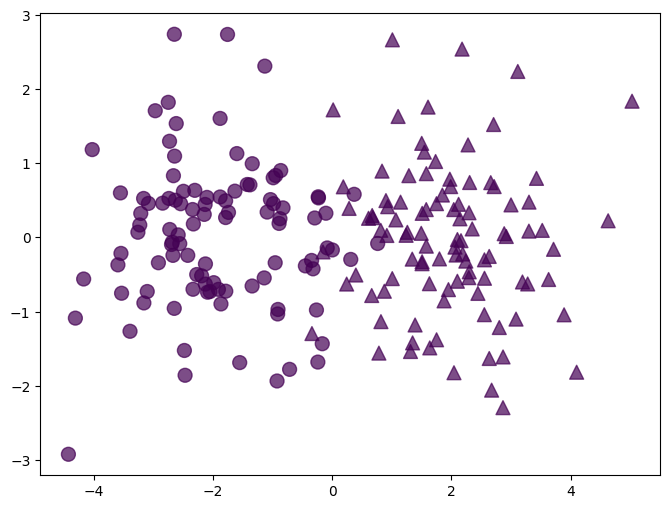

In [3]:
# Creo Gausianas, dos clusters

def genera_dos_gausianas(n = 100, gap = 2):
    gausianas = np.zeros((2*n, 3))

    x = np.random.normal(-gap, size=n)
    y = np.random.normal(0, size=n)
    c = np.repeat(0, n)
    gausianas[0:n, :] = np.vstack((x, y, c)).T

    x = np.random.normal(gap, size=n)
    y = np.random.normal(0, size=n)
    c = np.repeat(1, n)
    gausianas[n:(2*n), :] = np.vstack((x, y, c)).T

    return gausianas

gausianas = genera_dos_gausianas()

plot_data(gausianas[:, :2], gausianas[:, 2], gausianas[:, 2])

Aplicamos Agglomerative Clustering

In [4]:
# scipy hclust funciona con matrices de distancias
gausianas_diss = distance_matrix(gausianas[:, :2], gausianas[:, :2])
gausianas_diss = squareform(gausianas_diss)

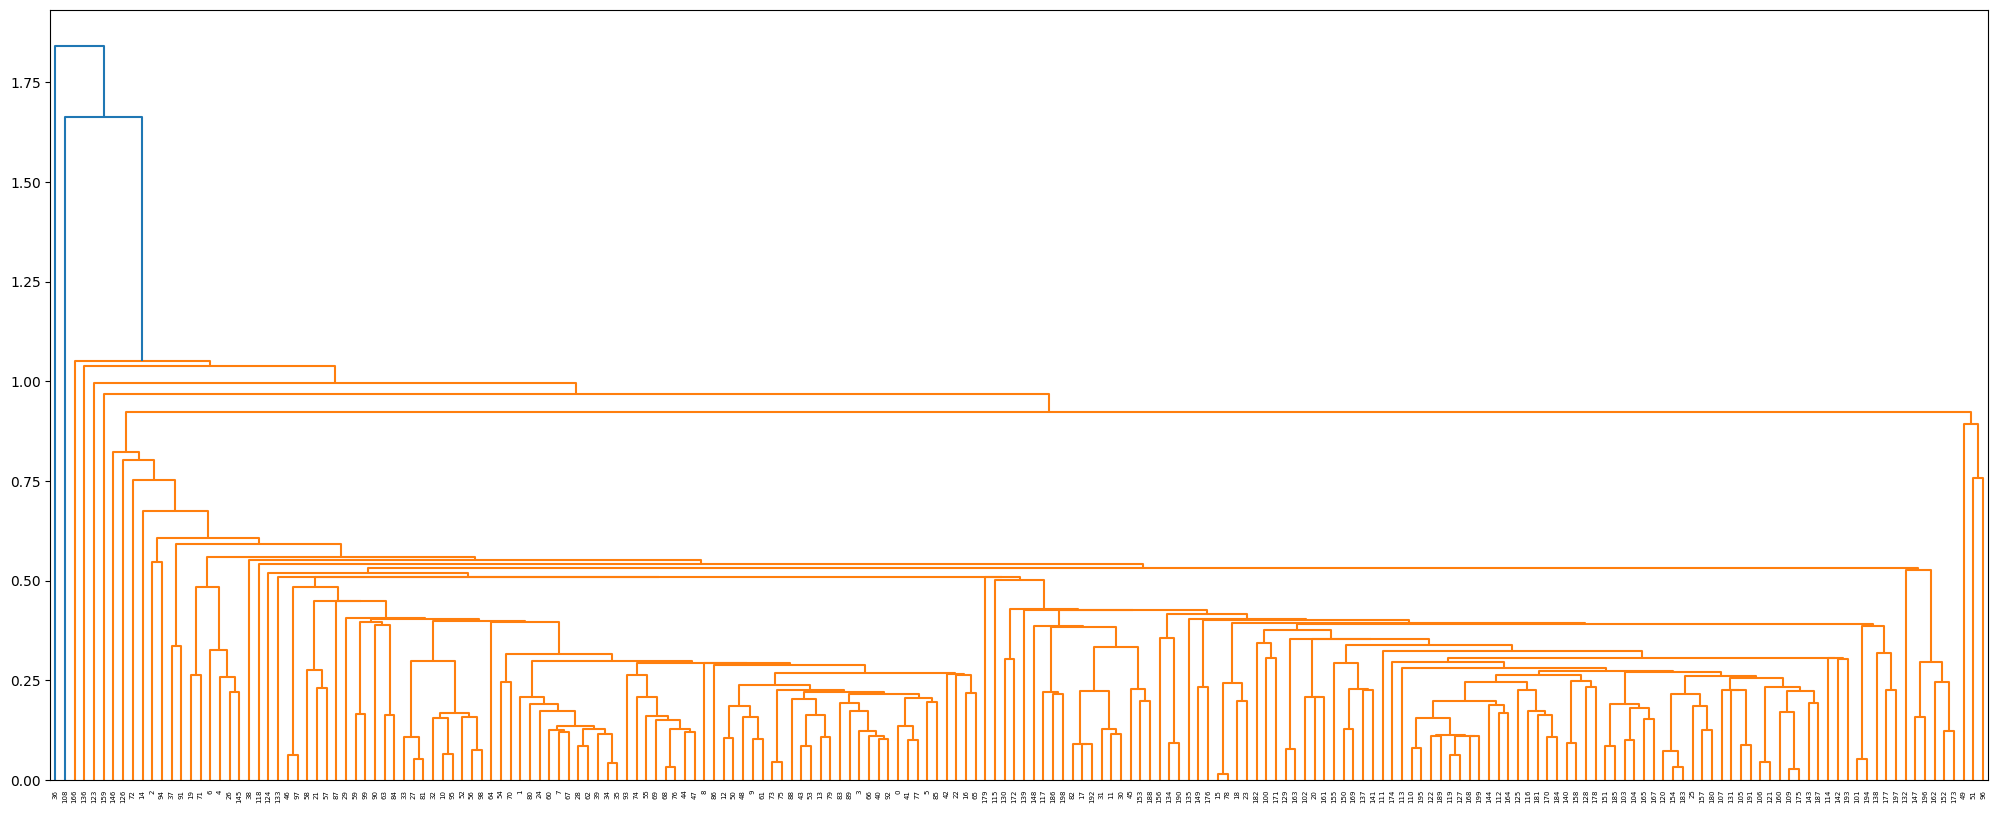

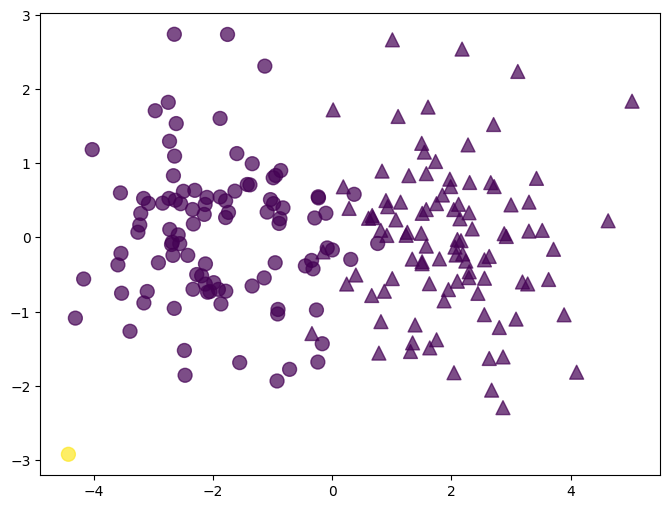

In [5]:
hclust = linkage(gausianas_diss, 'single')

fig = plt.figure(figsize=(25, 10))
_ = dendrogram(hclust)

plot_data(gausianas[:, :2], gausianas[:, 2], cut_tree(hclust, 2))

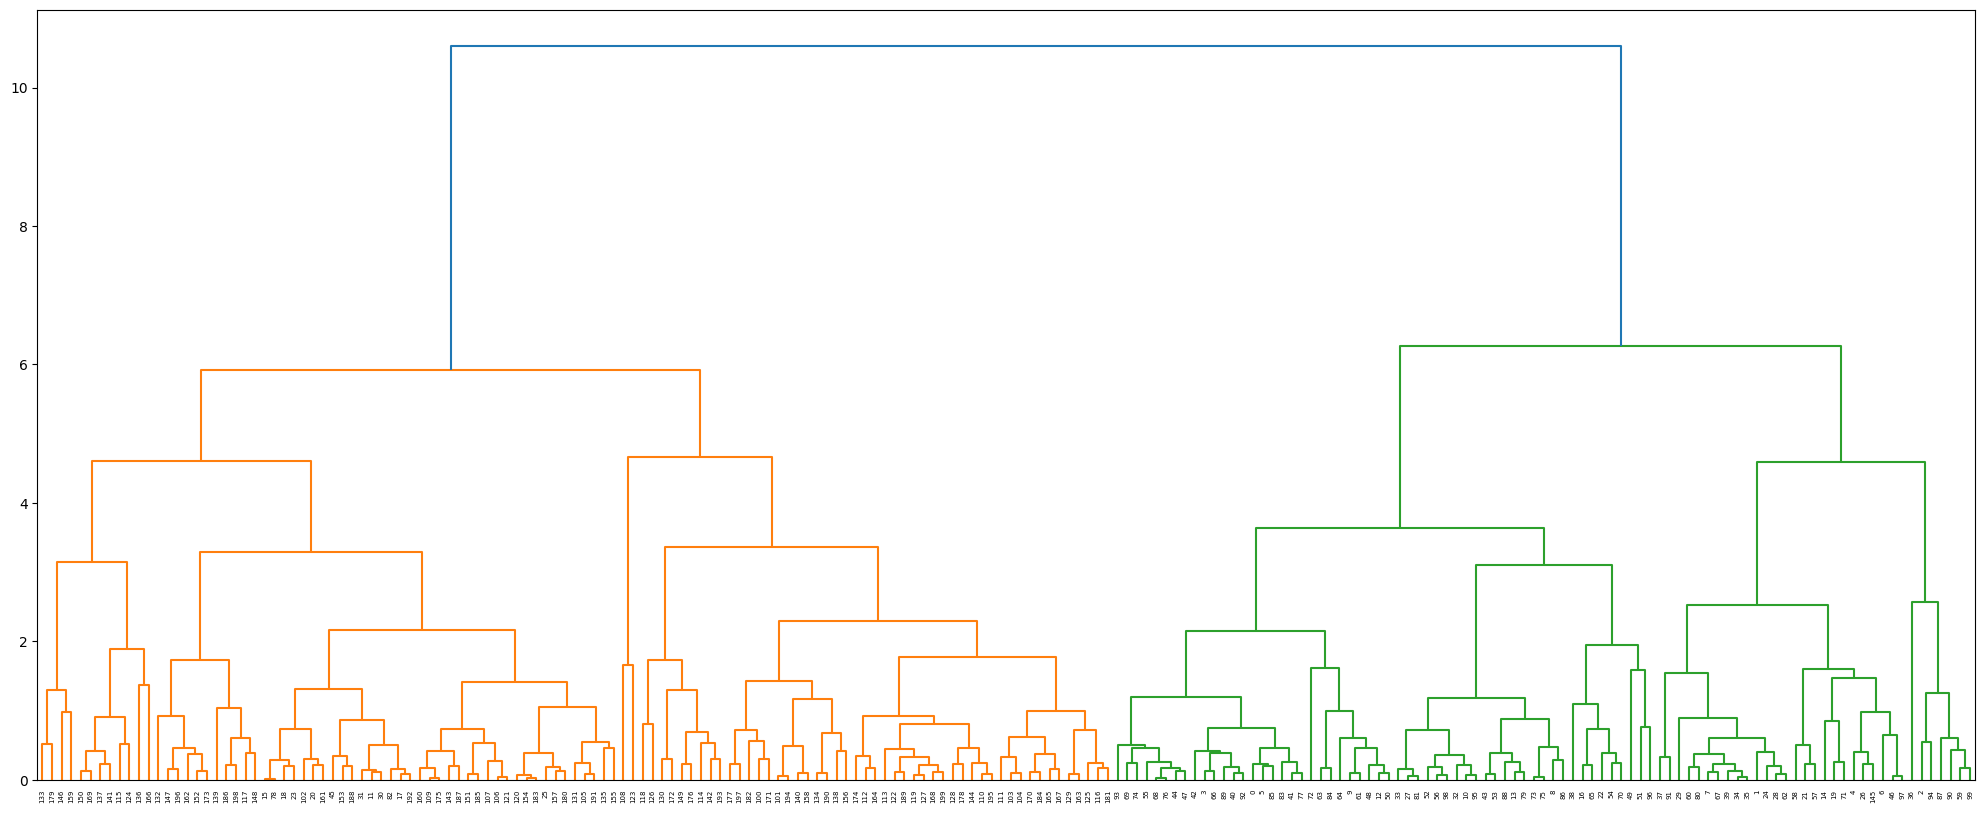

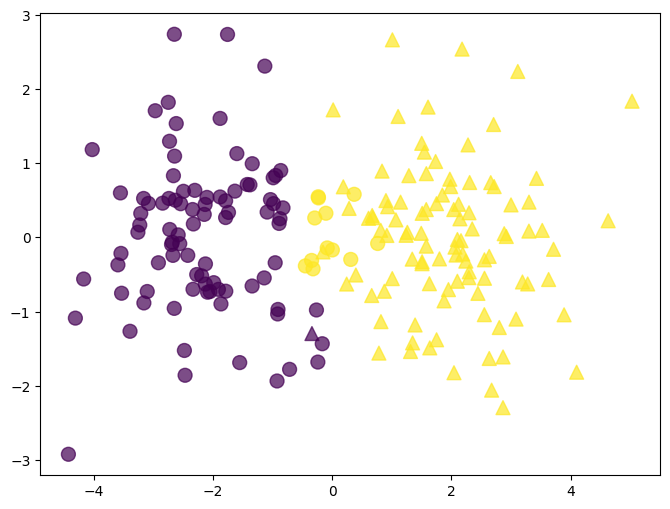

In [6]:
hclust = linkage(gausianas_diss, 'complete')

fig = plt.figure(figsize=(25, 10))
_ = dendrogram(hclust)

plot_data(gausianas[:, :2], gausianas[:, 2], cut_tree(hclust, 2))

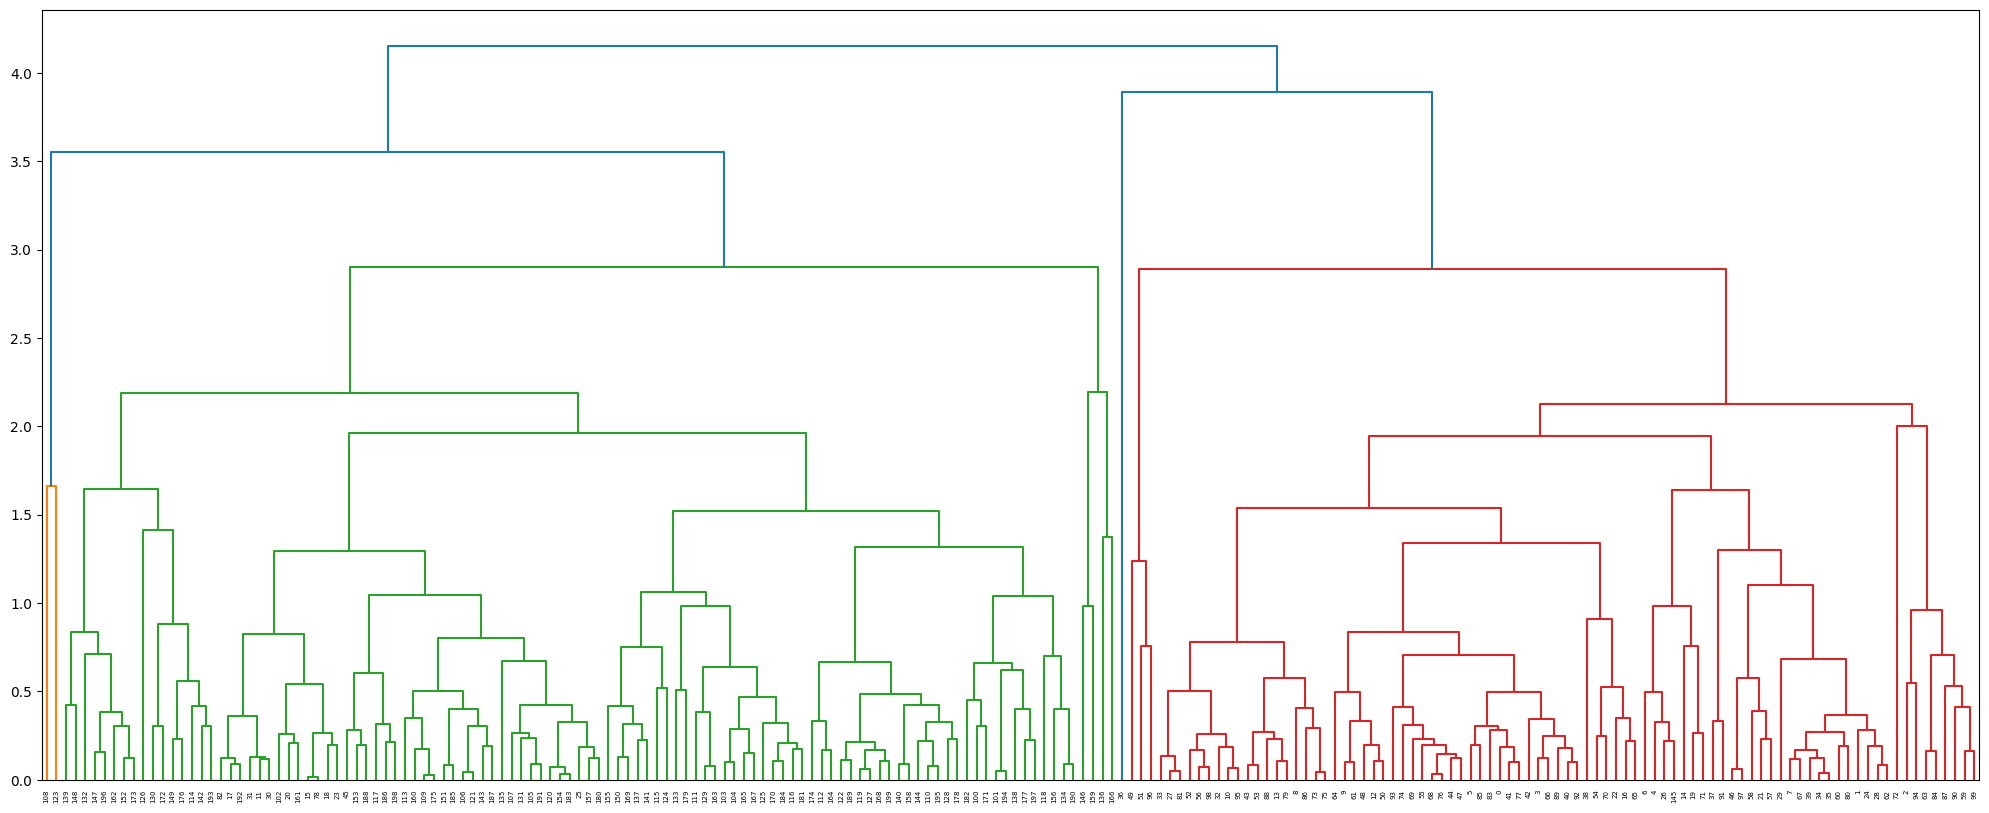

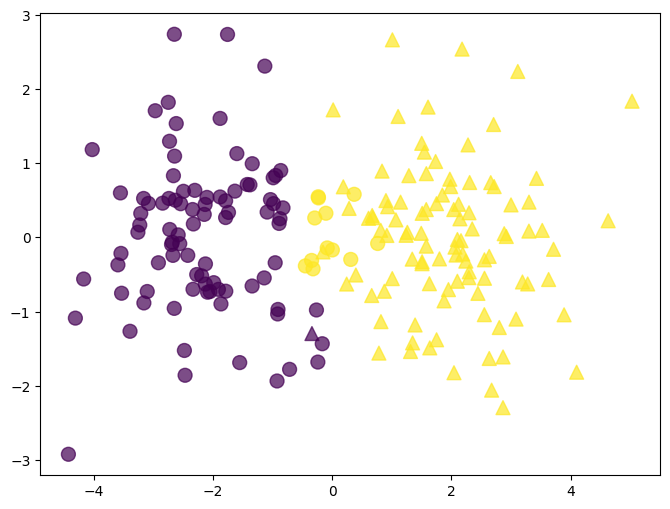

In [7]:
hclust = linkage(gausianas_diss, 'average')

fig = plt.figure(figsize=(25, 10))
_ = dendrogram(hclust)

plot_data(gausianas[:, :2], gausianas[:, 2], cut_tree(hclust, 2))

Moons Dataset

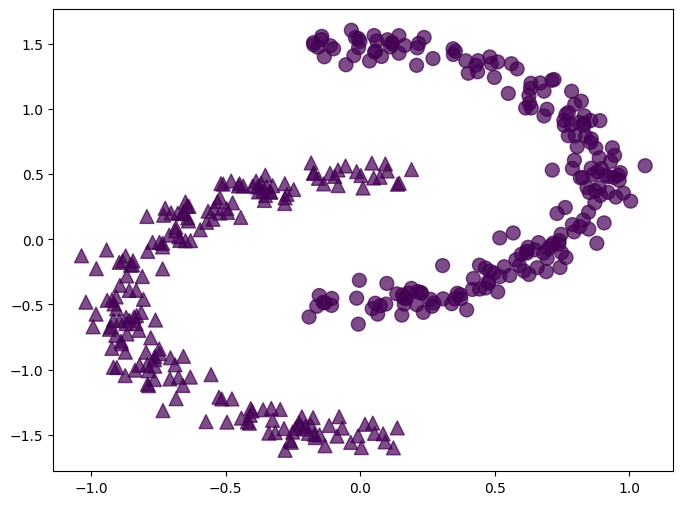

In [8]:
def genera_moons(n = 200, gap = -0.1, noise = 0.07):
    moons = np.zeros((n*2, 3))

    theta = np.random.uniform(-np.pi/2+gap, np.pi/2-gap, size=n)
    rho = np.random.normal(1, noise, size=n)
    x = rho * np.cos(theta) - 0.1
    y = rho * np.sin(theta) + 0.5
    c = np.repeat(0, n)
    moons[0:n, :] = np.vstack((x,y,c)).T

    theta = np.random.uniform(np.pi/2+gap, 3/2*np.pi-gap, size=n)
    rho = np.random.normal(1, noise, size=n)
    x = rho * np.cos(theta) + 0.1
    y = rho * np.sin(theta) - 0.5
    c = np.repeat(1, n)
    moons[n:(2*n), :] = np.vstack((x,y,c)).T

    return moons

moons = genera_moons()
plot_data(moons[:, :2], moons[:, 2], moons[:, 2])

HClust en Moons. ¿QUE DEBERÍA DAR?

In [9]:
# scipy hclust funciona con matrices de distancias
moons_diss = distance_matrix(moons[:, :2], moons[:, :2])
moons_diss = squareform(moons_diss)

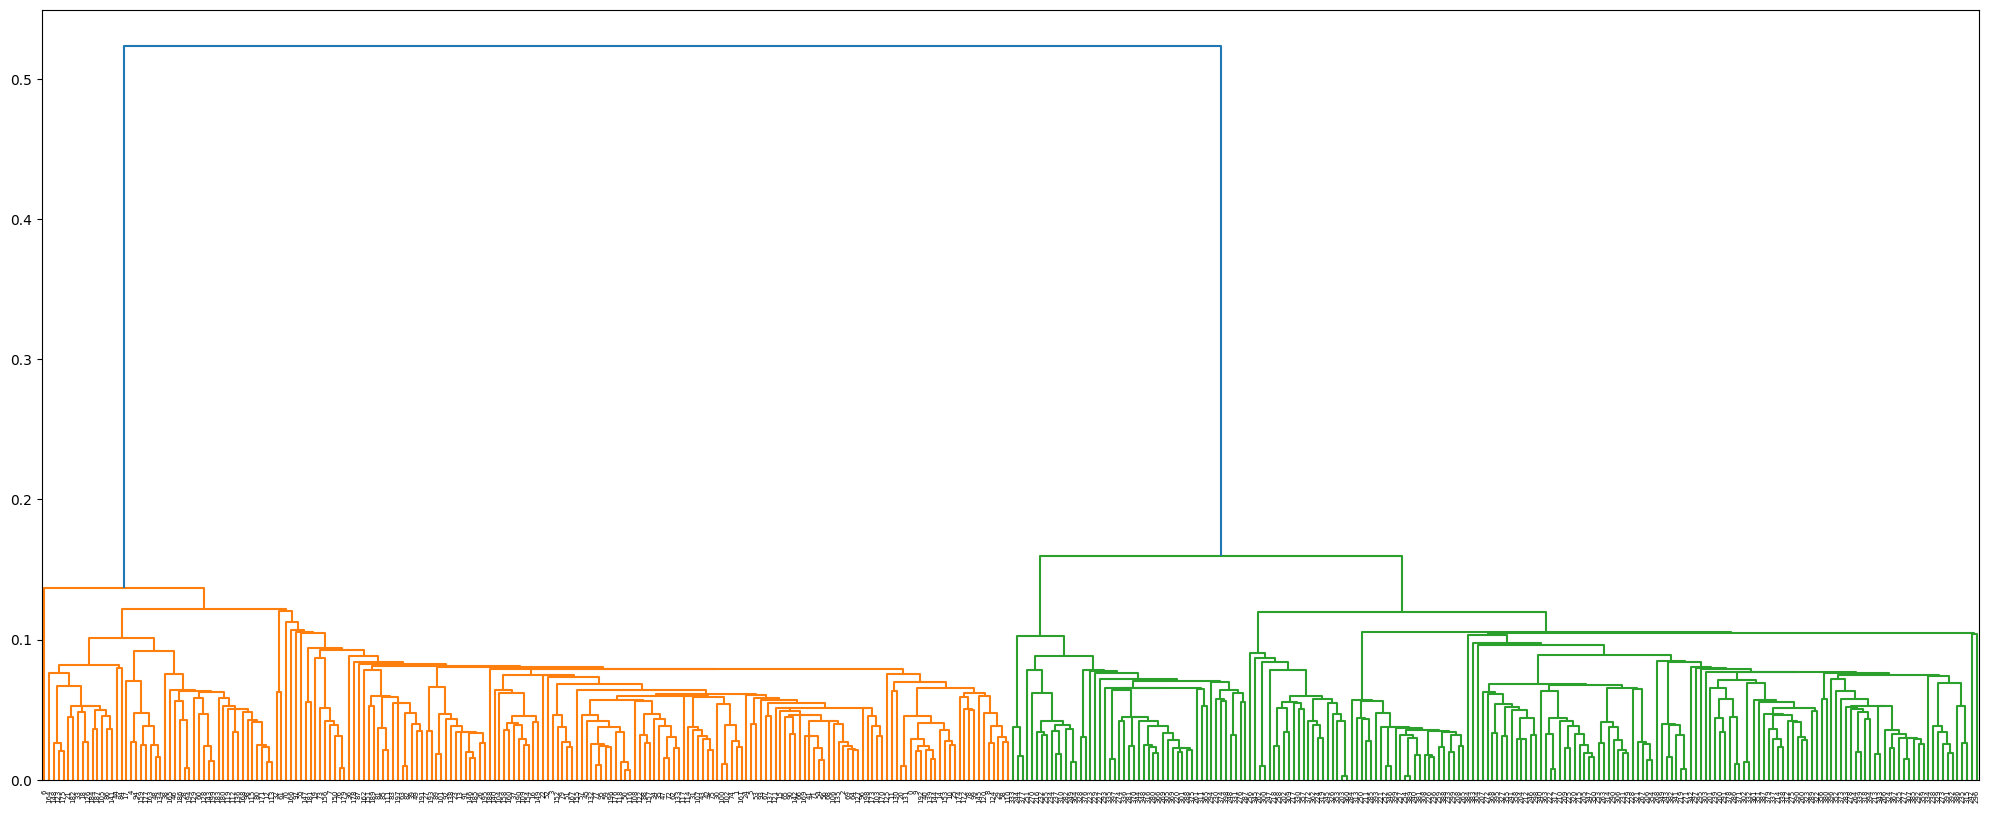

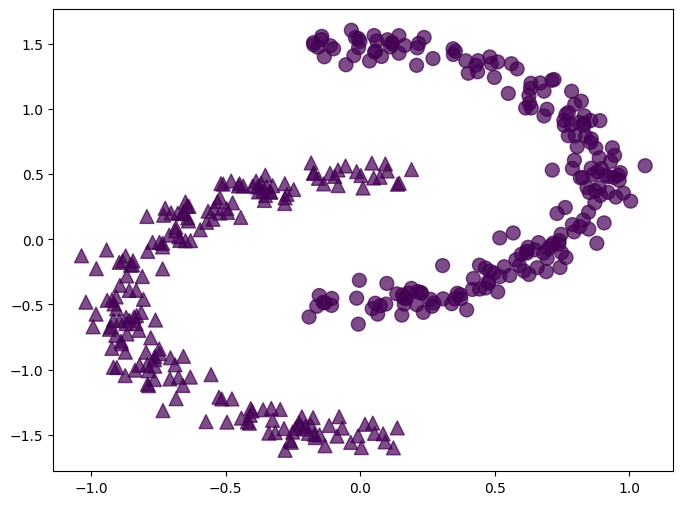

In [10]:
hclust = linkage(moons_diss, 'single')

fig = plt.figure(figsize=(25, 10))
_ = dendrogram(hclust)

plot_data(moons[:, :2], moons[:, 2], cut_tree(hclust, 2))

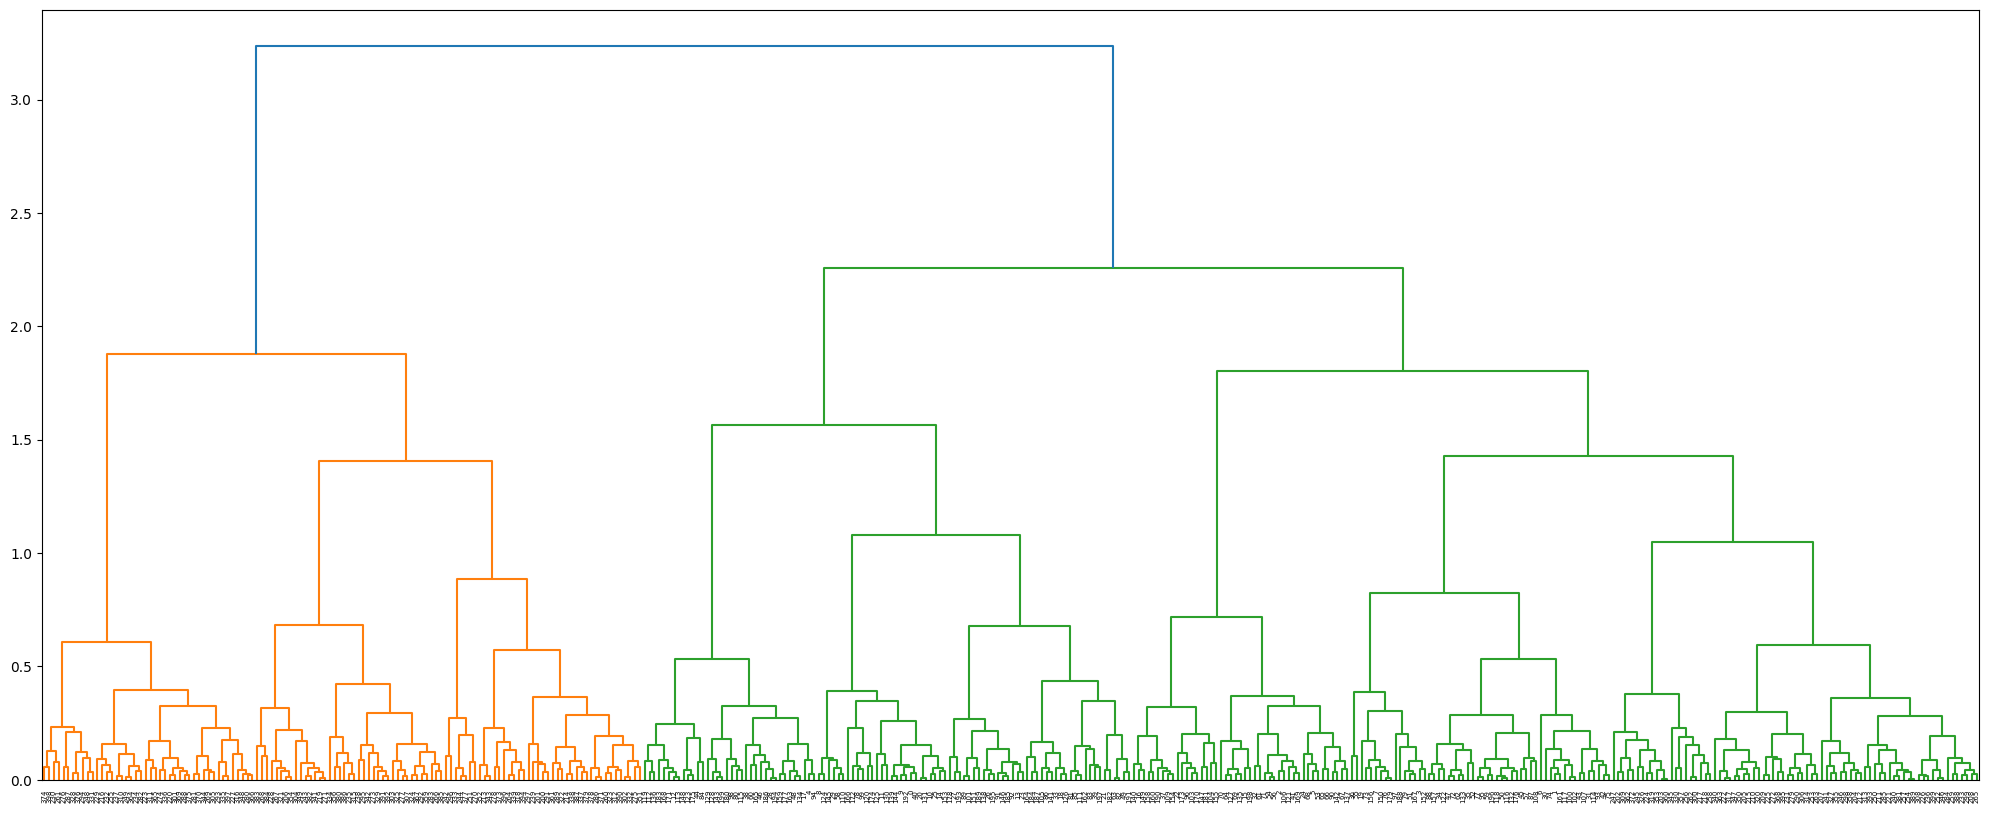

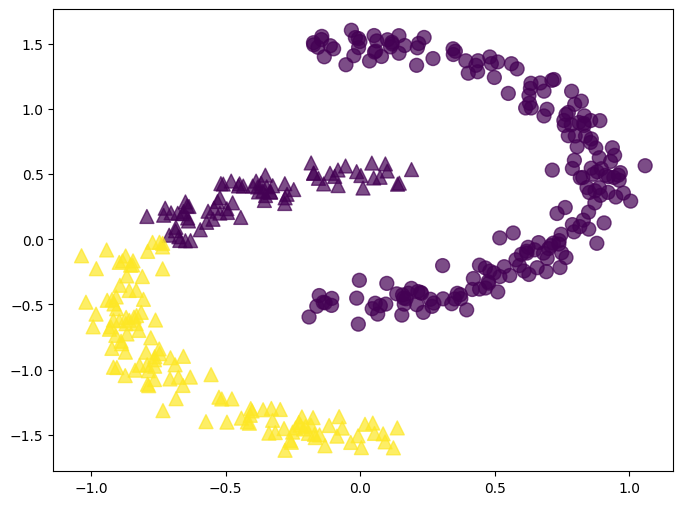

In [11]:
hclust = linkage(moons_diss, 'complete')

fig = plt.figure(figsize=(25, 10))
_ = dendrogram(hclust)

plot_data(moons[:, :2], moons[:, 2], cut_tree(hclust, 2))

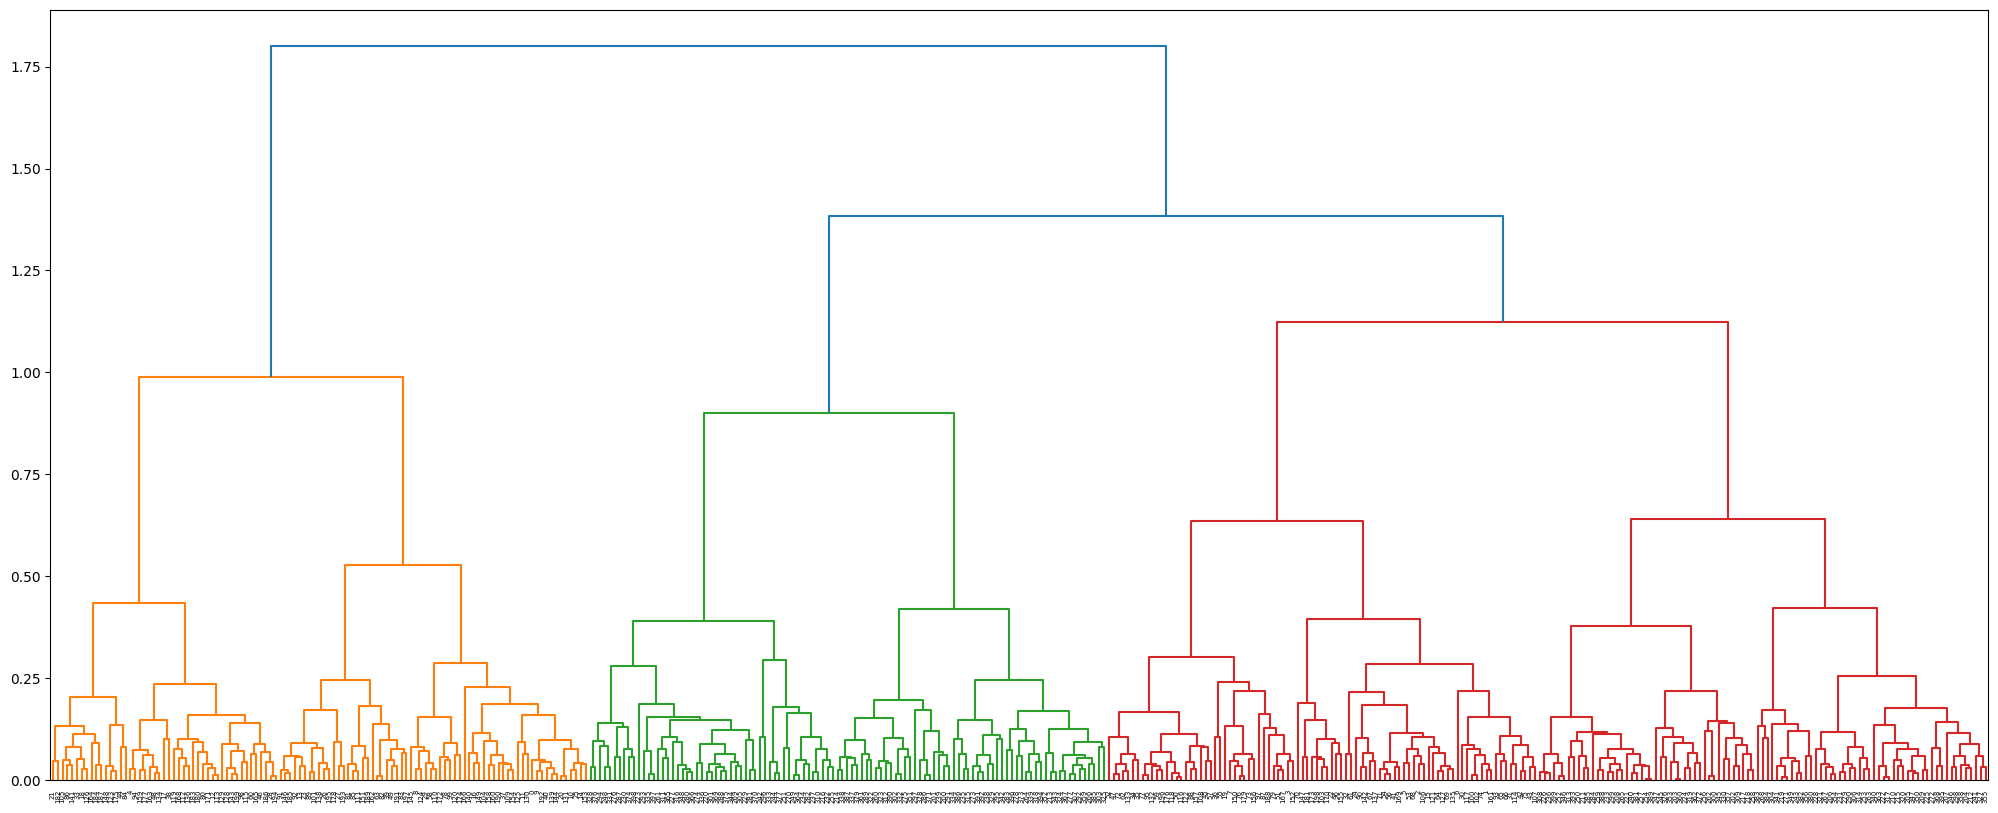

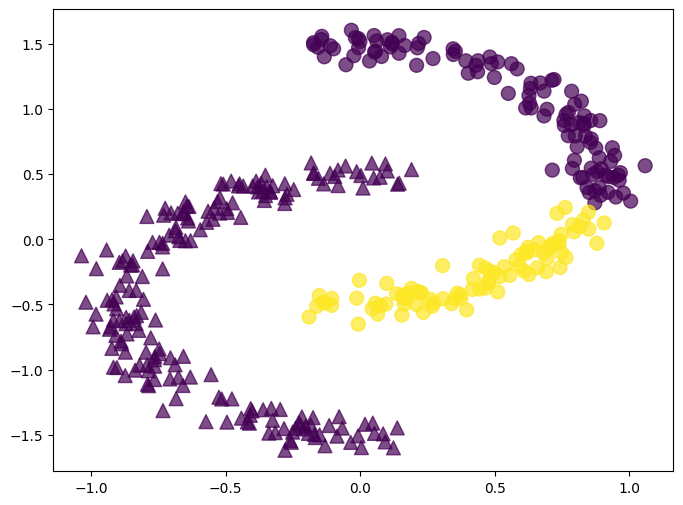

In [12]:
hclust = linkage(moons_diss, 'average')

fig = plt.figure(figsize=(25, 10))
_ = dendrogram(hclust)

plot_data(moons[:, :2], moons[:, 2], cut_tree(hclust, 2))

# Outliers

Genero un Outlier en gausianas

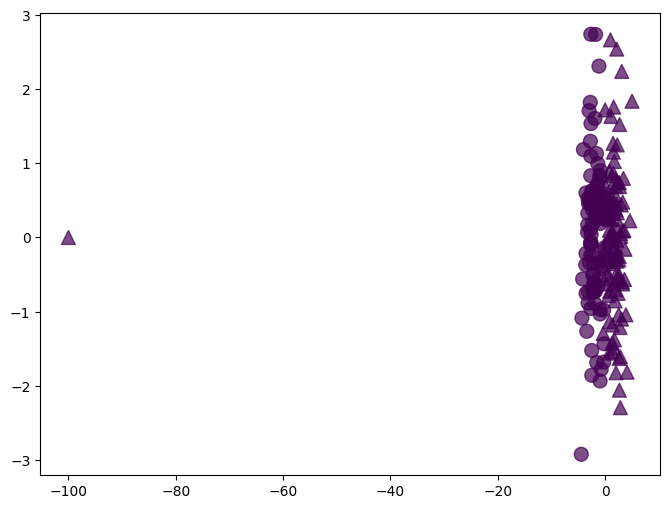

In [13]:
gausianas_anterior = gausianas.copy()
gausianas[0, :] = [-100, 0, 1]

plot_data(gausianas[:, :2], gausianas[:, 2], gausianas[:, 2])

Aplico HClust

In [14]:
# scipy hclust funciona con matrices de distancias
gausianas_diss = distance_matrix(gausianas[:, :2], gausianas[:, :2])
gausianas_diss = squareform(gausianas_diss)

(199, 4)
(200, 1)


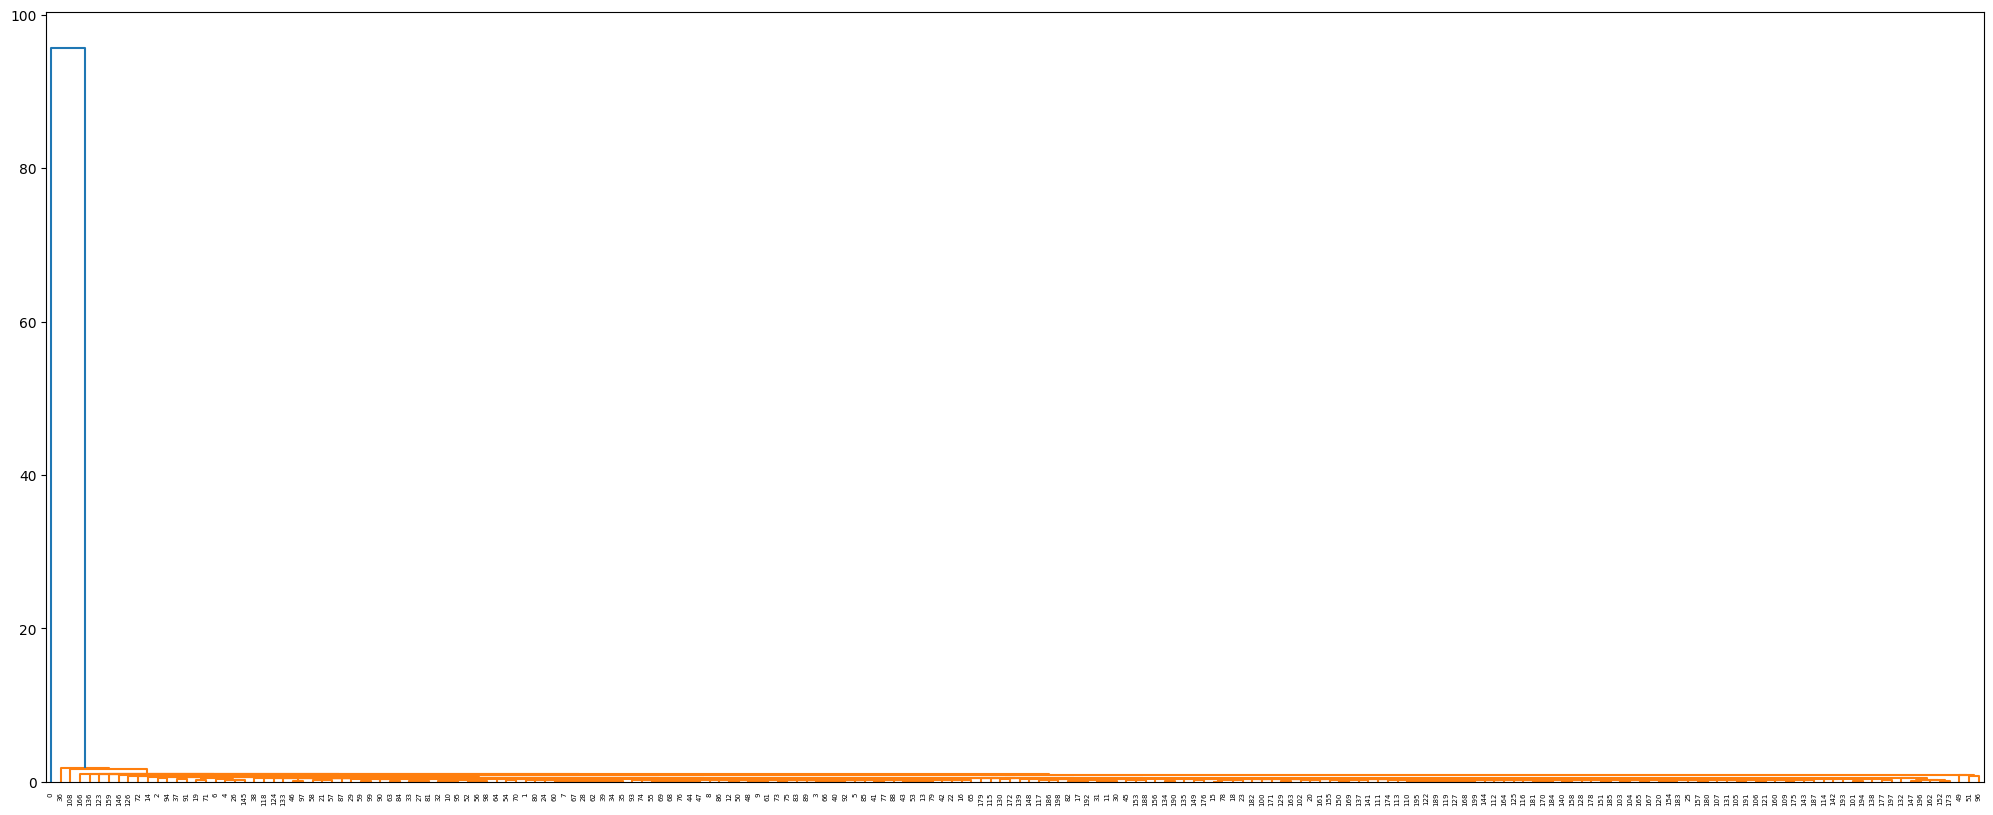

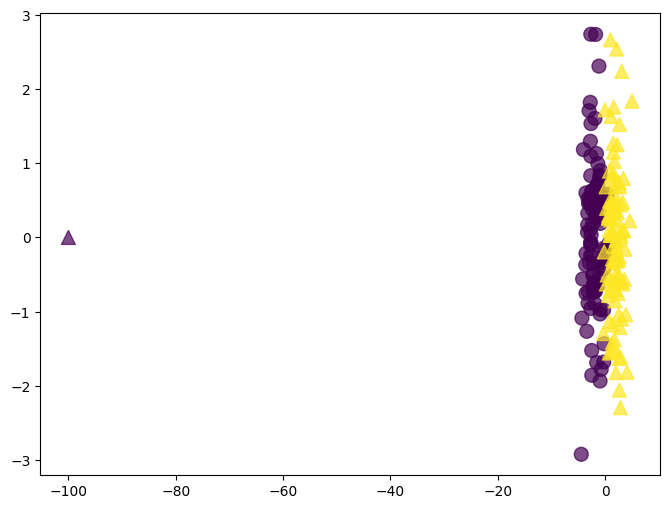

In [15]:
hclust = linkage(gausianas_diss, 'single')

fig = plt.figure(figsize=(25, 10))
_ = dendrogram(hclust)

print(hclust.shape)
print(cut_tree(hclust, 2).shape)

plot_data(gausianas[:, :2], gausianas[:, 2], cut_tree(hclust, 2))

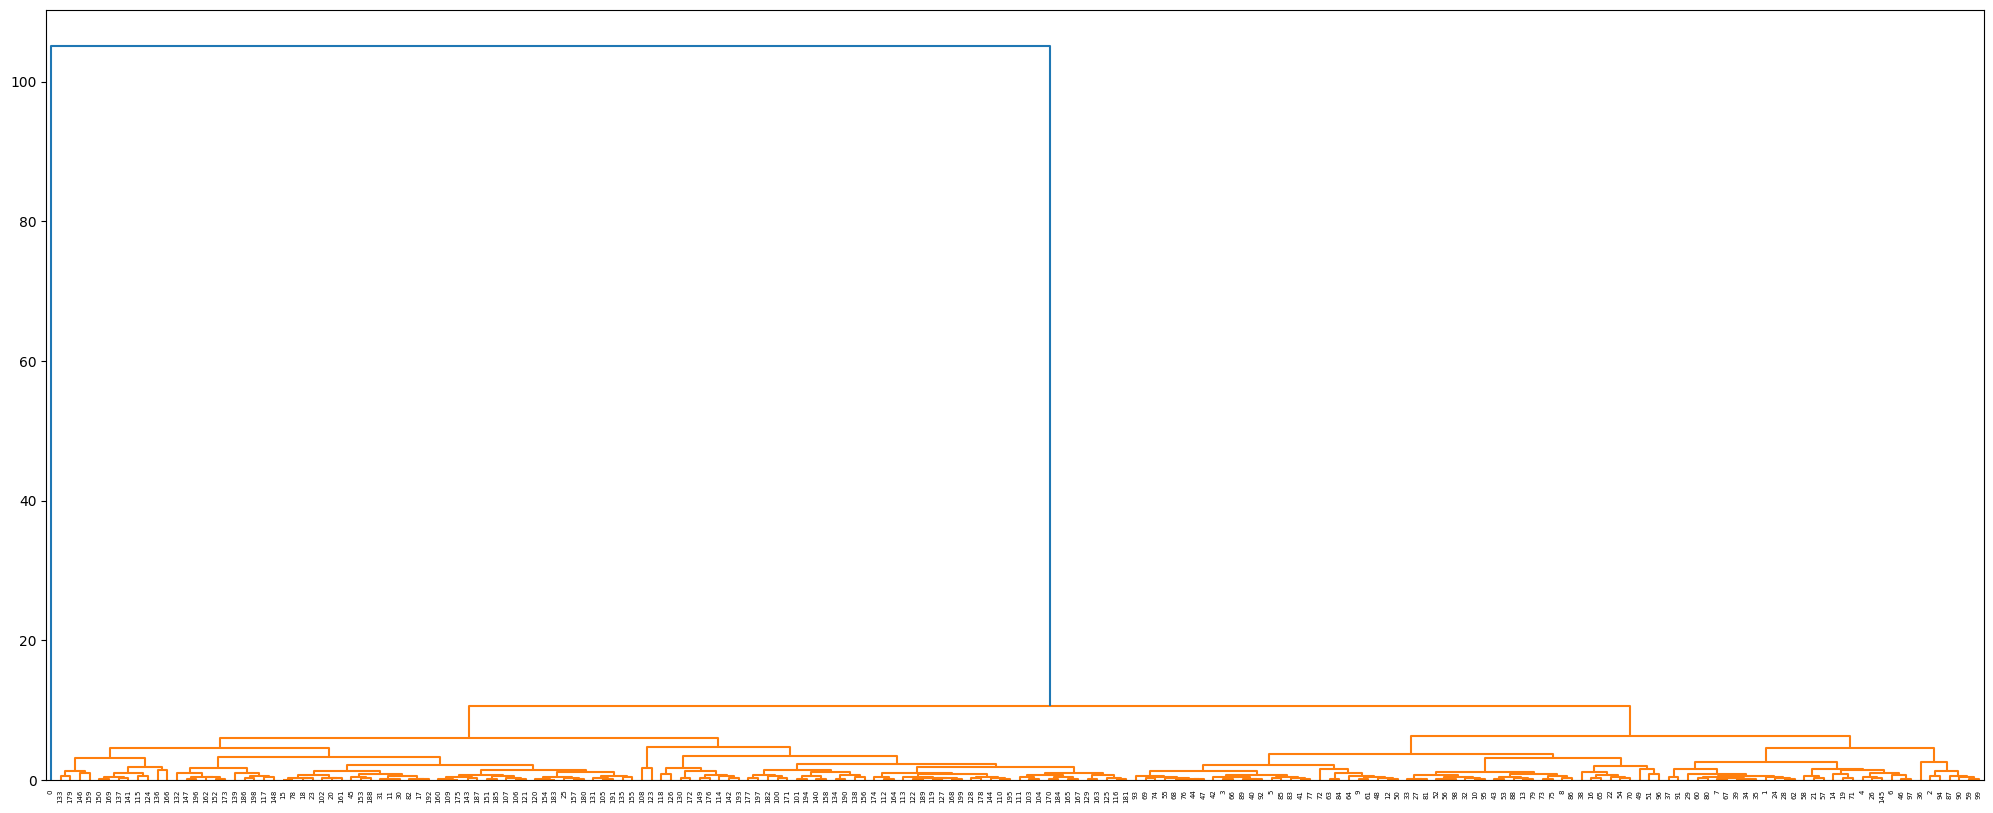

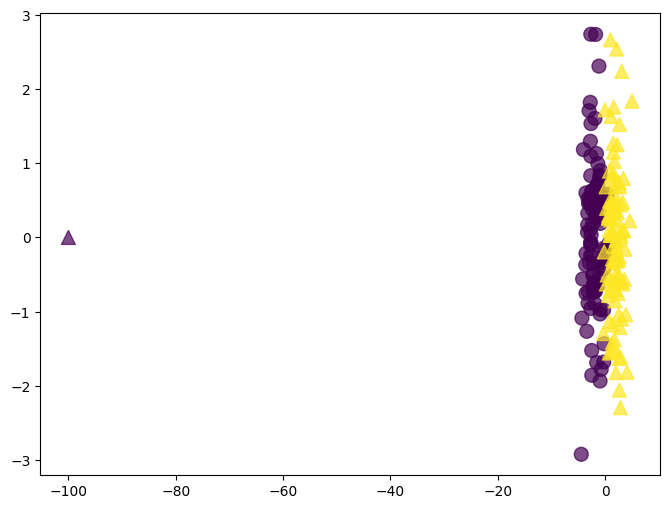

In [16]:
hclust = linkage(gausianas_diss, 'complete')

fig = plt.figure(figsize=(25, 10))
_ = dendrogram(hclust)

plot_data(gausianas[:, :2], gausianas[:, 2], cut_tree(hclust, 2))

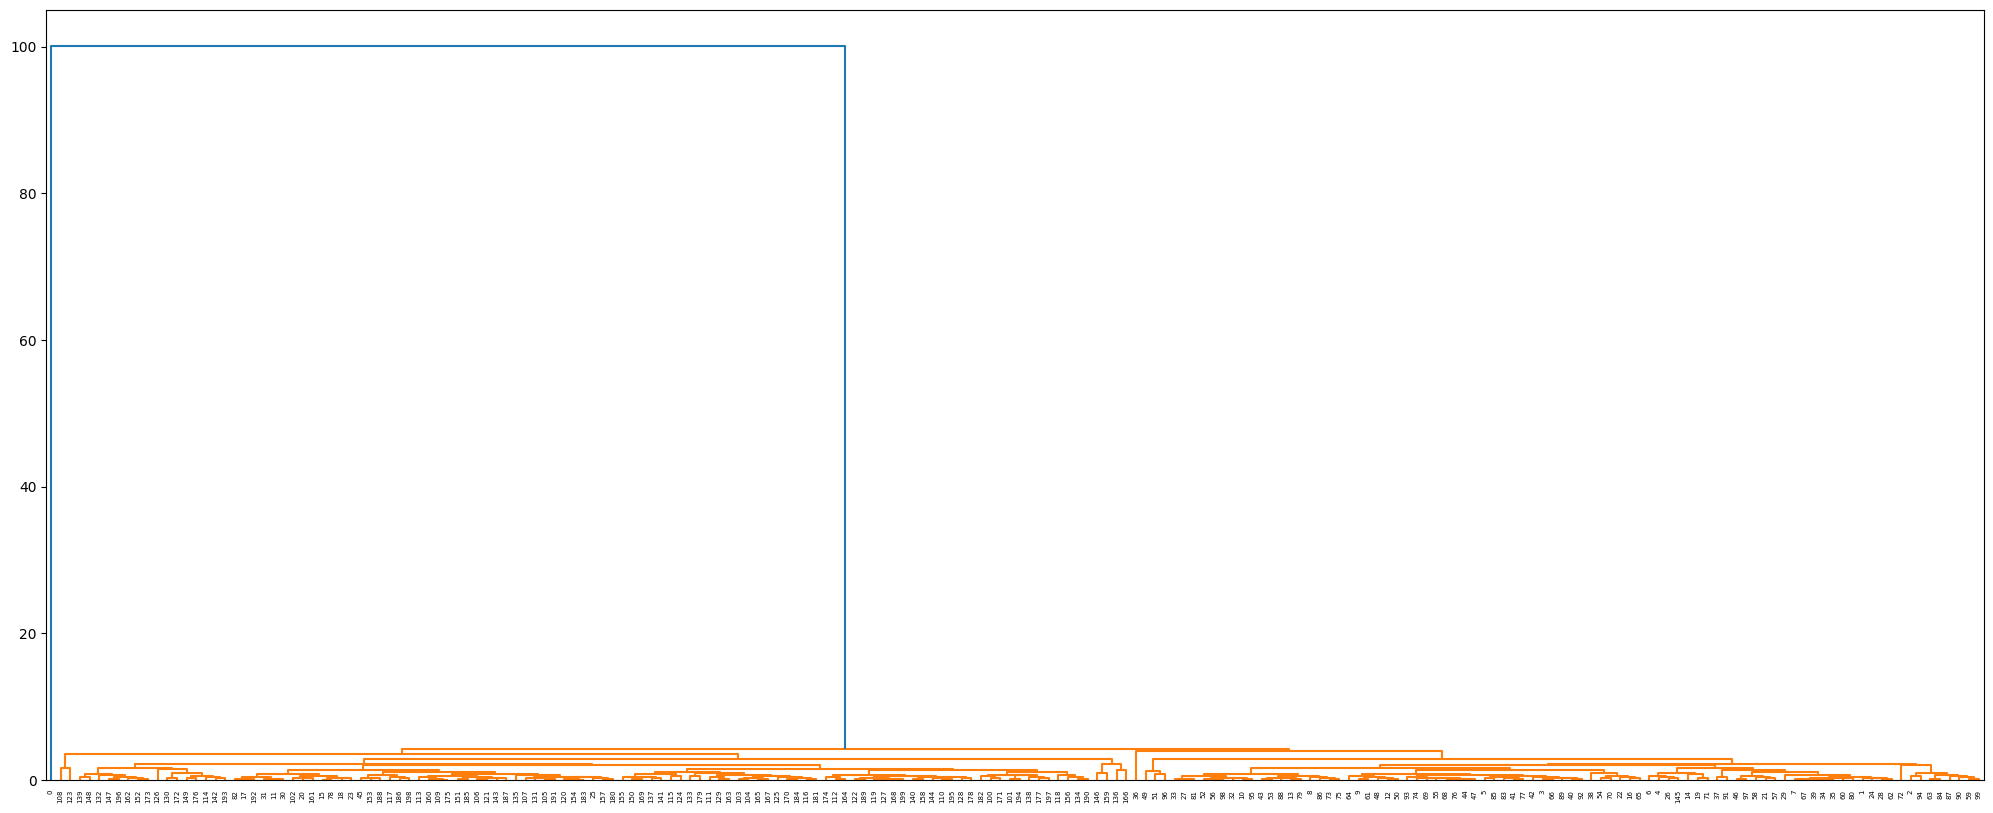

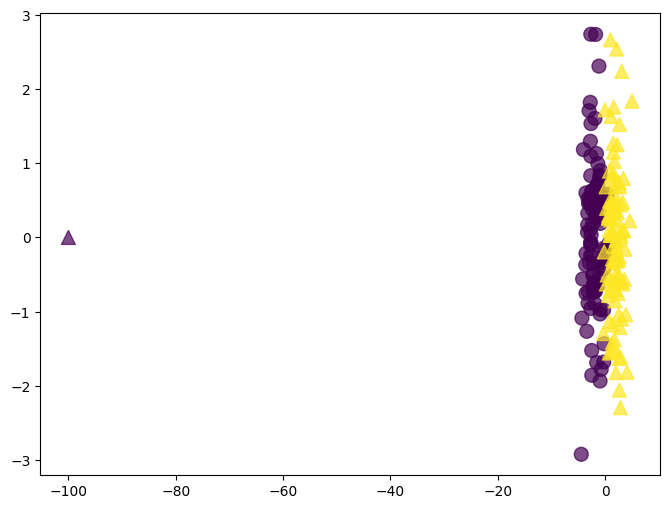

In [17]:
hclust = linkage(gausianas_diss, 'average')

fig = plt.figure(figsize=(25, 10))
_ = dendrogram(hclust)

plot_data(gausianas[:, :2], gausianas[:, 2], cut_tree(hclust, 2))

¿Probemos 3 clusters?

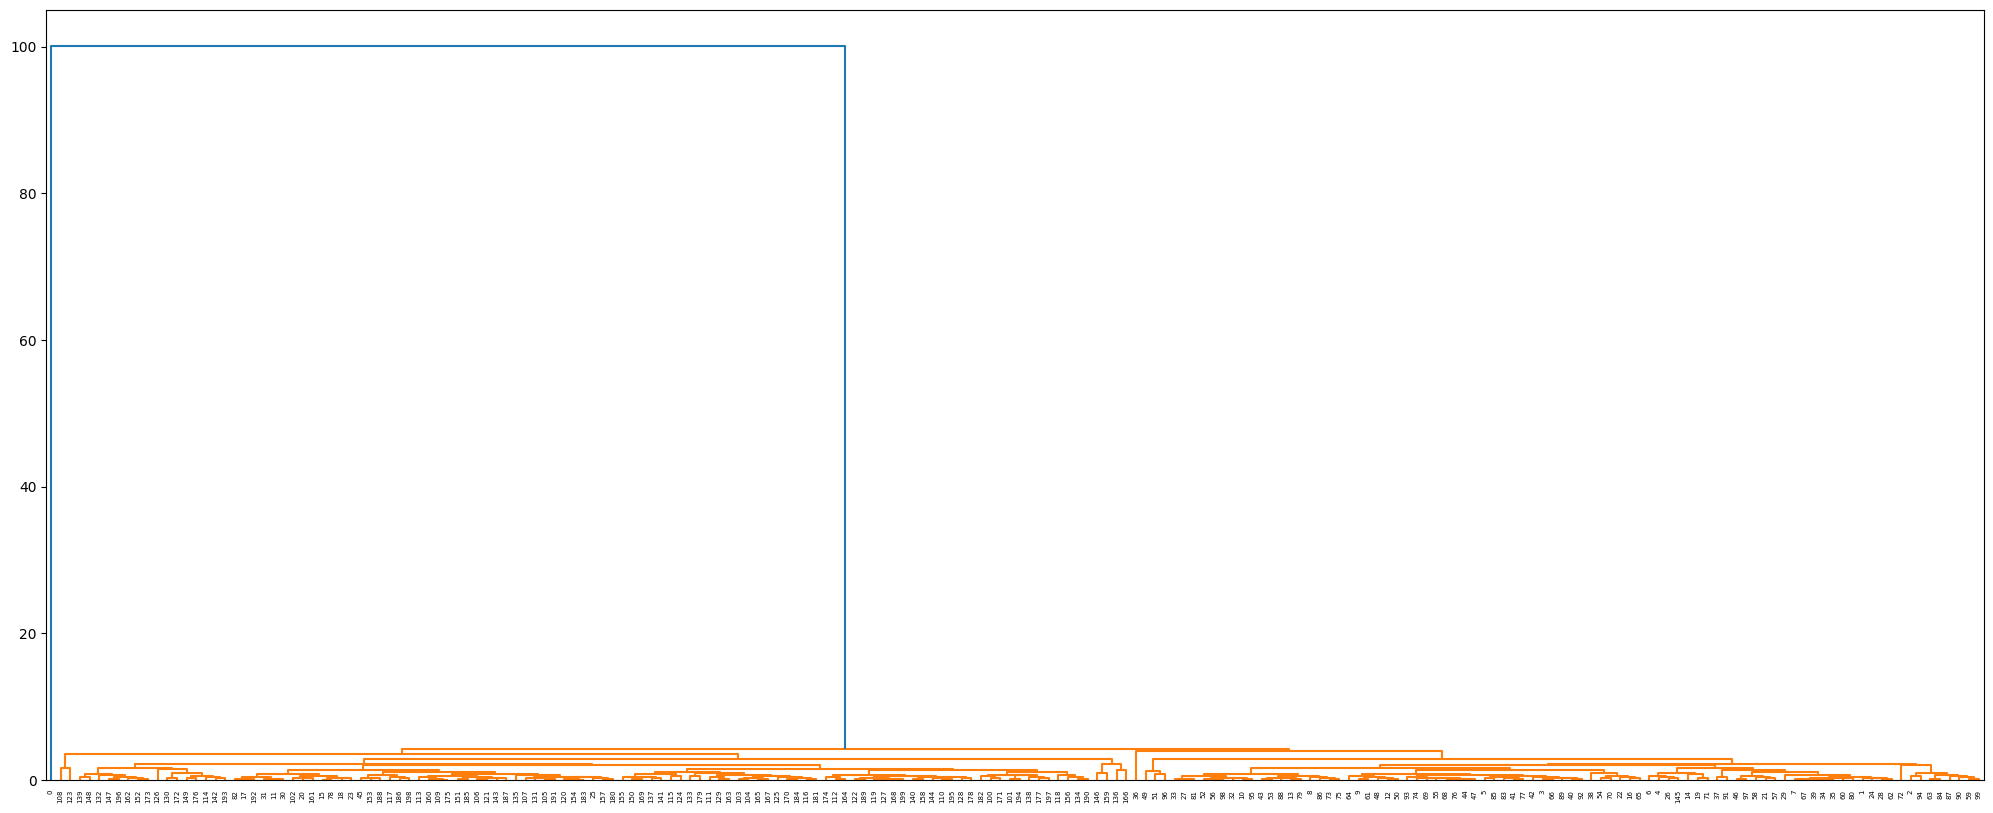

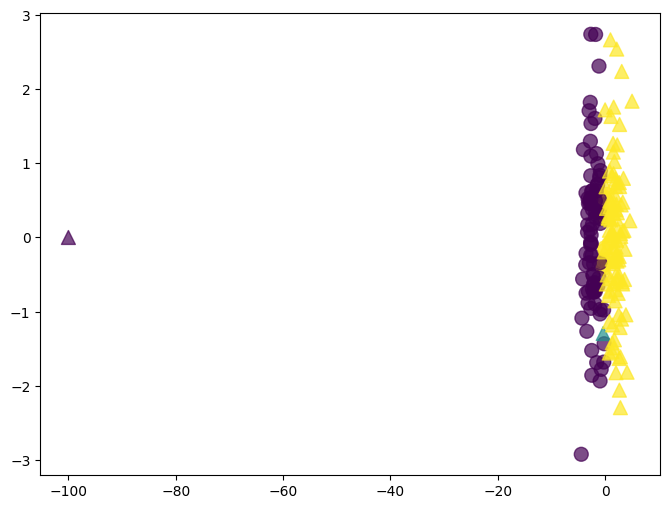

In [18]:
hclust = linkage(gausianas_diss, 'average')

fig = plt.figure(figsize=(25, 10))
_ = dendrogram(hclust)

plot_data(gausianas[:, :2], gausianas[:, 2], cut_tree(hclust, 3))

# Versión corta y un poco más simple del código

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [20]:
def crea_gausianas(tot_puntos=100, gap=2):
    x1 = np.random.normal(loc=-gap, size=tot_puntos)
    y1 = np.random.normal(loc=0, size=tot_puntos)
    g1 = np.column_stack((x1, y1, np.ones(tot_puntos)))

    x2 = np.random.normal(loc=gap, size=tot_puntos)
    y2 = np.random.normal(loc=0, size=tot_puntos)
    g2 = np.column_stack((x2, y2, np.full(tot_puntos, 2)))

    return np.vstack((g1, g2))

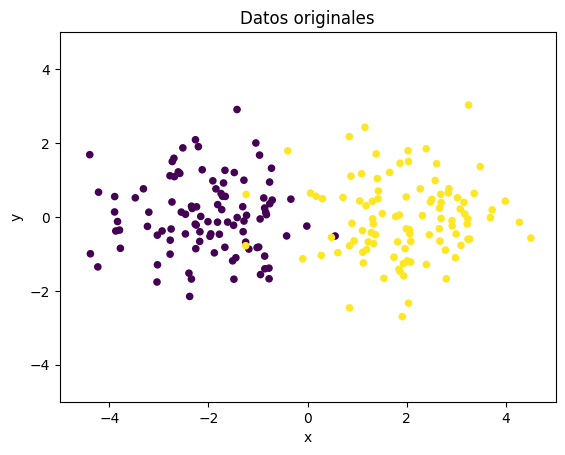

In [21]:
gausianas = crea_gausianas()
X = gausianas[:, :2]
labels_true = gausianas[:, 2]

# Graficar datos originales
plt.scatter(X[:, 0], X[:, 1], c=labels_true, cmap="viridis", s=20)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Datos originales")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()


Método: single


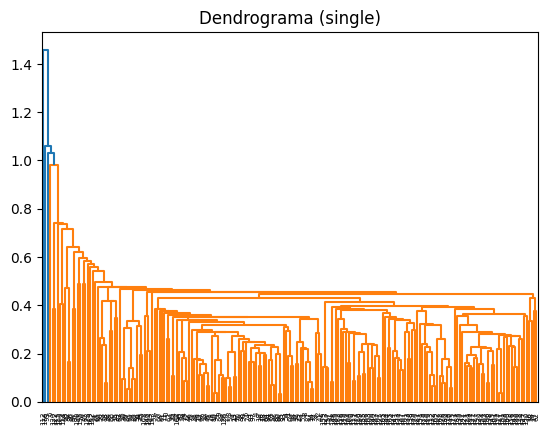

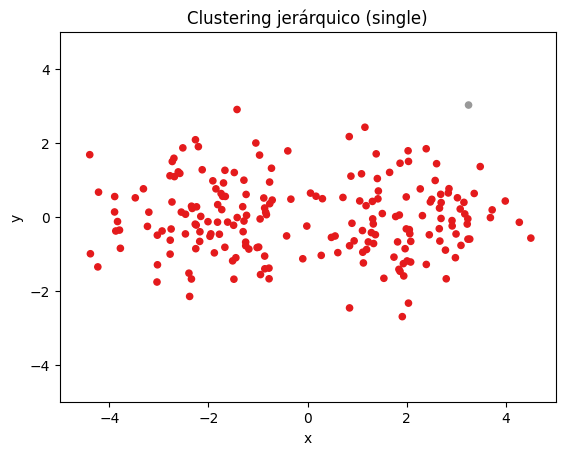


Método: complete


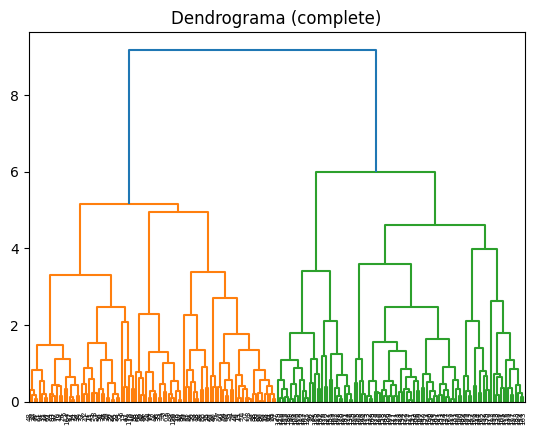

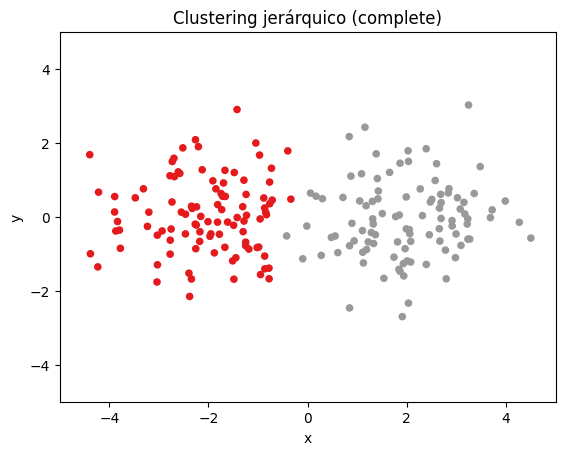


Método: average


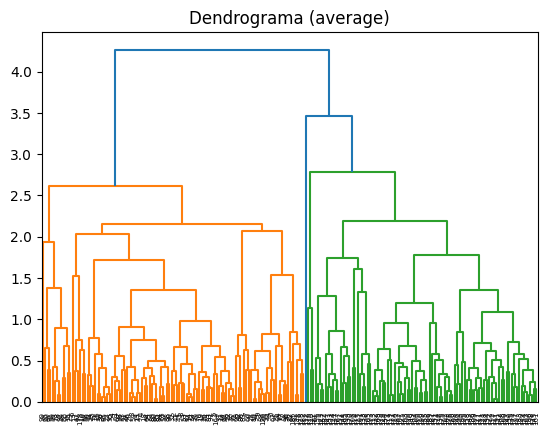

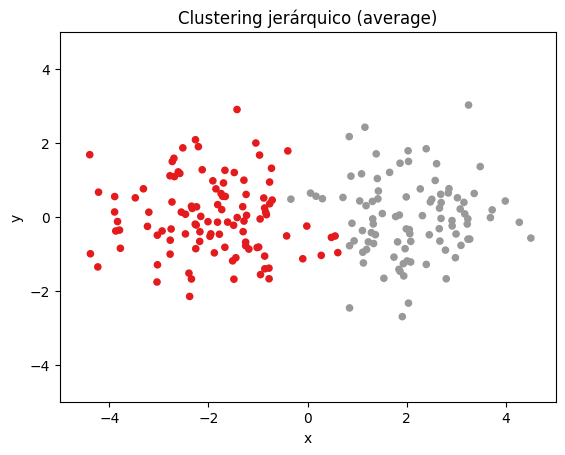

In [22]:
for method in ["single", "complete", "average"]:
    print(f"\nMétodo: {method}")

    Z = linkage(X, method=method)  # clustering jerárquico

    # Dendrograma
    plt.figure()
    dendrogram(Z)
    plt.title(f"Dendrograma ({method})")
    plt.show()

    # Cortar en 2 clusters
    clusters = cut_tree(Z, n_clusters=2).flatten()

    # Graficar clustering
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="Set1", s=20)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Clustering jerárquico ({method})")
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.show()

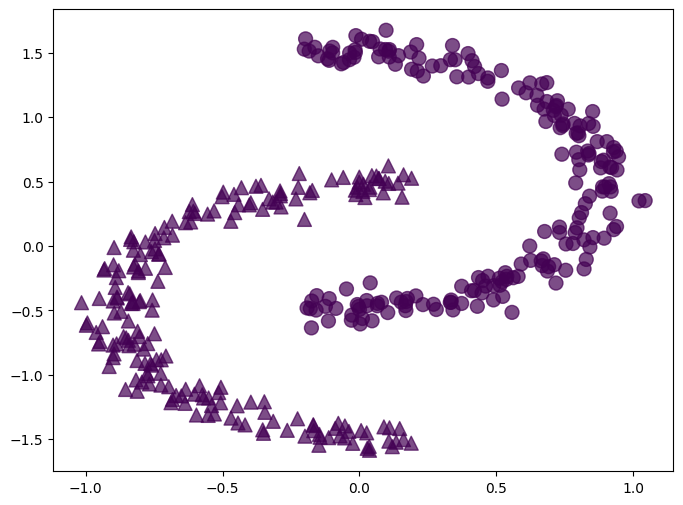

In [23]:
def genera_moons(n = 200, gap = -0.1, noise = 0.07):
    moons = np.zeros((n*2, 3))

    theta = np.random.uniform(-np.pi/2+gap, np.pi/2-gap, size=n)
    rho = np.random.normal(1, noise, size=n)
    x = rho * np.cos(theta) - 0.1
    y = rho * np.sin(theta) + 0.5
    c = np.repeat(0, n)
    moons[0:n, :] = np.vstack((x,y,c)).T

    theta = np.random.uniform(np.pi/2+gap, 3/2*np.pi-gap, size=n)
    rho = np.random.normal(1, noise, size=n)
    x = rho * np.cos(theta) + 0.1
    y = rho * np.sin(theta) - 0.5
    c = np.repeat(1, n)
    moons[n:(2*n), :] = np.vstack((x,y,c)).T

    return moons

X = genera_moons()
plot_data(X[:, :2], X[:, 2], X[:, 2])


Método: single


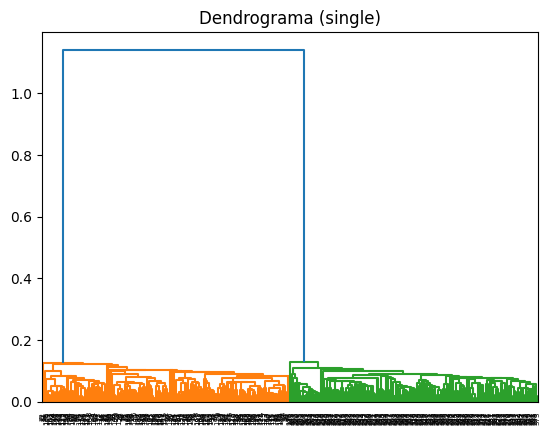

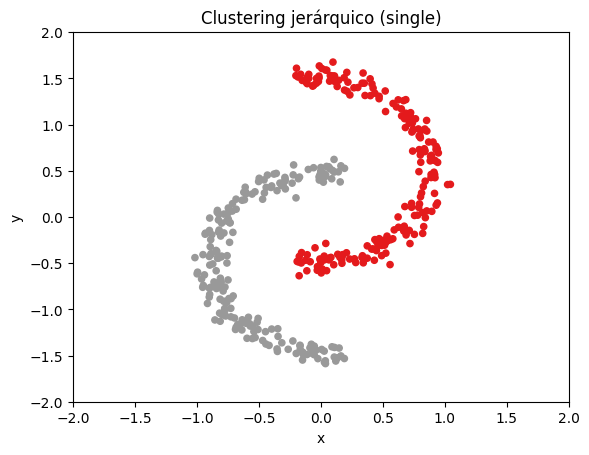


Método: complete


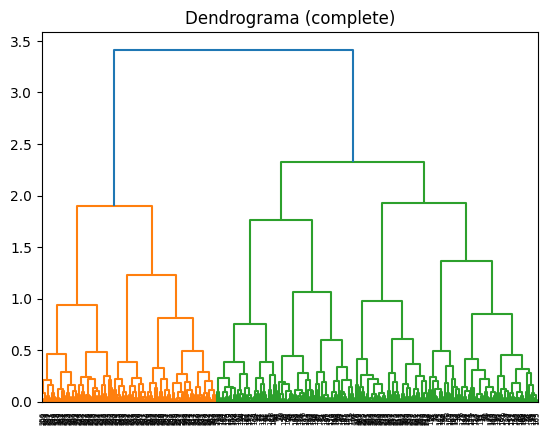

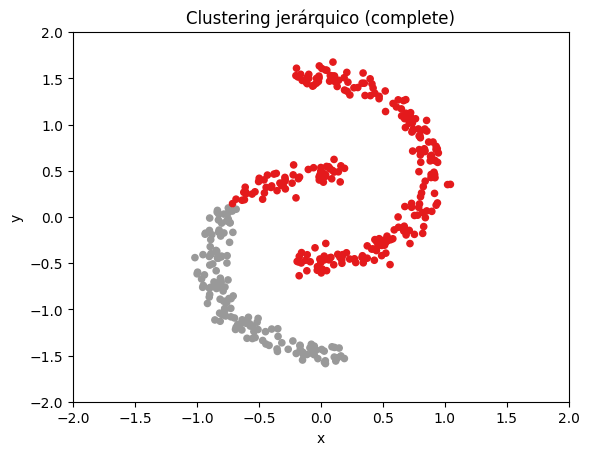


Método: average


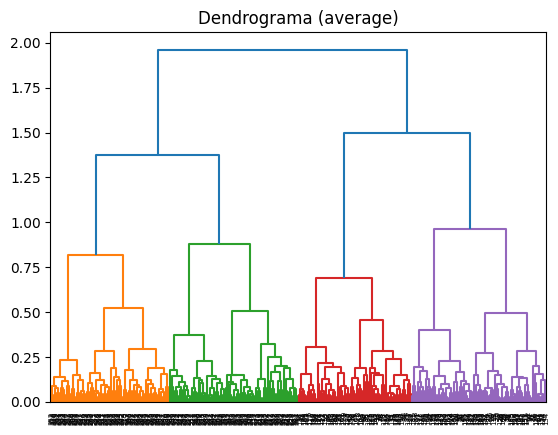

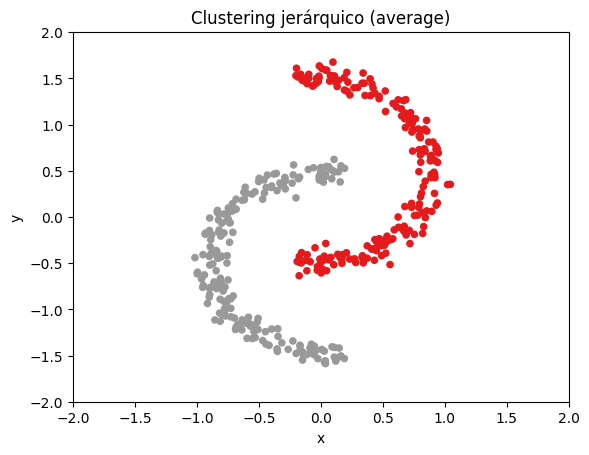

In [24]:
for method in ["single", "complete", "average"]:
    print(f"\nMétodo: {method}")

    Z = linkage(X, method=method)  # clustering jerárquico

    # Dendrograma
    plt.figure()
    dendrogram(Z)
    plt.title(f"Dendrograma ({method})")
    plt.show()

    # Cortar en 2 clusters
    clusters = cut_tree(Z, n_clusters=2).flatten()

    # Graficar clustering
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="Set1", s=20)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Clustering jerárquico ({method})")
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.show()